

## Делим семантическое пространство на кластеры
*   Загружаем файл эмбеддингов ('ru_cbow_normalized_embeddings.npy')
*   Получаем файл word_partition
*   И файлы точек по каждому кластеру





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from tqdm.auto import tqdm
import pandas as pd

In [ ]:
# загружаем нормализованные, только точки, не словарь
ru_word_space = np.load('ru_cbow_normalized_embeddings.npy')

### K-Means

#### k = 10

In [ ]:
from sklearn.cluster import KMeans
from collections import Counter

# Параметры:
# n_init=10, чем больше - тем стабильнее результат, но дольше вычисления
# random_state – воспроизводимость
ru_word_km = KMeans(10, n_init=10, random_state=42)
ru_word_km.fit(ru_word_space)
Counter(ru_word_km.labels_)

Counter({np.int32(8): 9427,
         np.int32(9): 5776,
         np.int32(3): 8874,
         np.int32(5): 7041,
         np.int32(2): 8386,
         np.int32(1): 8316,
         np.int32(4): 5965,
         np.int32(0): 6483,
         np.int32(6): 7715,
         np.int32(7): 4128})

In [ ]:
ru_word_partition_norm = np.array(ru_word_km.labels_.copy(), dtype='str')

In [ ]:
np.save('ru_word_partition_norm.npy', ru_word_partition_norm)

#### k = 5

In [ ]:
from sklearn.cluster import KMeans
from collections import Counter

# Параметры:
# n_init=10, чем больше - тем стабильнее результат, но дольше вычисления
# random_state – воспроизводимость
# если нужны одинаковые результаты при каждом запуске, задайте random_state=42
ru_word_km_5 = KMeans(5, n_init=10, random_state=42)
ru_word_km_5.fit(ru_word_space)
Counter(ru_word_km_5.labels_)

Counter({np.int32(3): 19538,
         np.int32(0): 16820,
         np.int32(4): 9251,
         np.int32(1): 13818,
         np.int32(2): 12684})

In [ ]:
ru_word_partition_norm_5 = np.array(ru_word_km_5.labels_.copy(), dtype='str')

In [ ]:
np.save('ru_word_partition_norm_5.npy', ru_word_partition_norm_5)

### Сохранение сабсетов

In [ ]:
for c in np.unique(ru_word_partition_norm):
    subset = ru_word_space[ru_word_partition_norm == c]
    print(c, subset.shape)
    np.save(f'ru_word_norm_{c}.npy', subset)

0 (6483, 100)
1 (8316, 100)
2 (8386, 100)
3 (8874, 100)
4 (5965, 100)
5 (7041, 100)
6 (7715, 100)
7 (4128, 100)
8 (9427, 100)
9 (5776, 100)


In [ ]:
for c in np.unique(ru_word_partition_norm_5):
    subset = ru_word_space[ru_word_partition_norm_5 == c]
    print(c, subset.shape)
    np.save(f'ru_word_norm_5_{c}.npy', subset)

0 (16820, 100)
1 (13818, 100)
2 (12684, 100)
3 (19538, 100)
4 (9251, 100)


In [ ]:
ru_0 = np.load('ru_word_norm_5_0.npy', allow_pickle=True)
ru_0

array([[ 0.01633083, -0.05007637, -0.04588547, ..., -0.05840091,
        -0.00742911,  0.04583603],
       [ 0.04722595,  0.08940684,  0.02827619, ..., -0.089564  ,
         0.01765272, -0.12360512],
       [-0.08667832,  0.12829147, -0.08635058, ..., -0.09340338,
        -0.11119201, -0.02191158],
       ...,
       [-0.09361866, -0.0418309 ,  0.1225286 , ...,  0.16457543,
        -0.14470859,  0.00170637],
       [-0.04979798, -0.02839501,  0.0083226 , ...,  0.01696287,
         0.03263495, -0.06069149],
       [-0.02245954,  0.07091609, -0.01373189, ..., -0.04464332,
        -0.08545243, -0.07626152]], dtype=float32)

### Визуализация

In [ ]:
from sklearn.decomposition import PCA
# n=2 для визуализации 2D n=3 for 3D
ru_word_pca = PCA(n_components=2)
ru_cbow_space_pca = ru_word_pca.fit_transform(ru_word_space)  # Fit + transform

In [ ]:
xl, xr = [np.percentile(ru_cbow_space_pca[:,0], q=40), np.percentile(ru_cbow_space_pca[:,0], q=60)]
yl, yr = [np.percentile(ru_cbow_space_pca[:,1], q=40), np.percentile(ru_cbow_space_pca[:,1], q=60)]

In [ ]:
idx = ((ru_cbow_space_pca[:,0] < xr) & (ru_cbow_space_pca[:,0] > xl) & \
 (ru_cbow_space_pca[:,1] < yr) & (ru_cbow_space_pca[:,1] > yl))

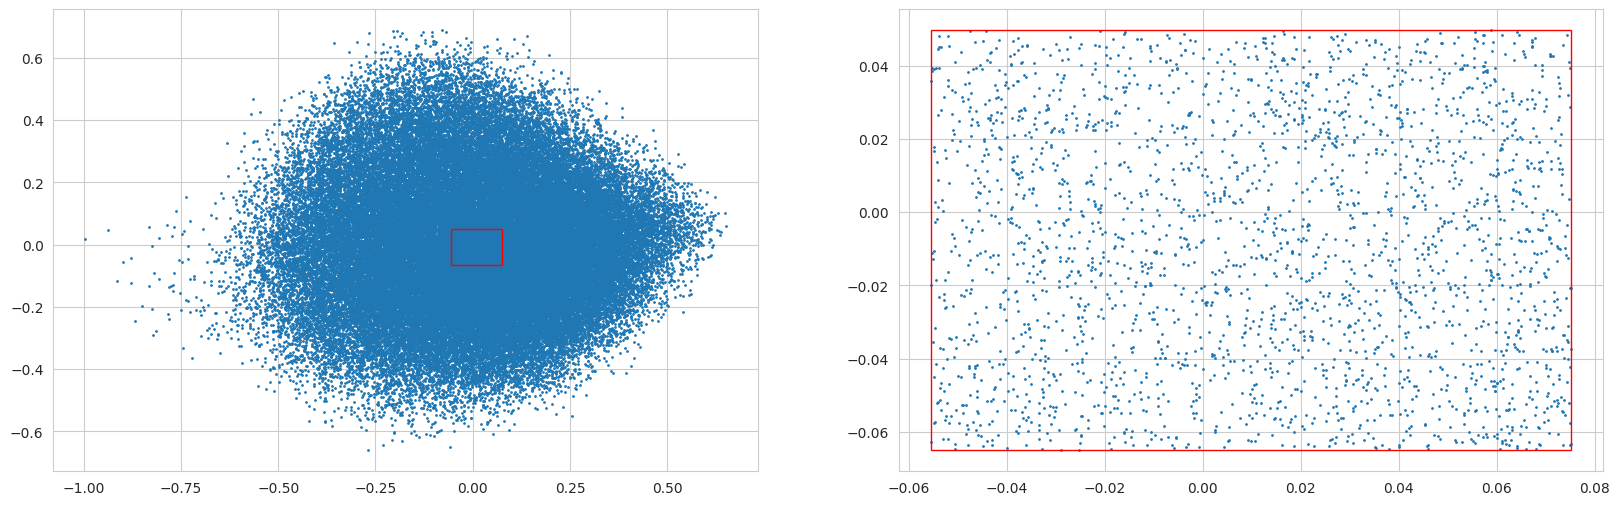

In [ ]:
from matplotlib.patches import Rectangle
fig, axs = plt.subplots(1, 2, figsize=(20,6))
axs[0].scatter(*ru_cbow_space_pca.T, s=1);
rect = Rectangle((xl, yl), xr-xl, yr-yl, color='r', fill=False)
axs[0].add_patch(rect)

axs[1].scatter(*ru_cbow_space_pca[idx].T, s=1);
rect = Rectangle((xl, yl), xr-xl, yr-yl, color='r', fill=False)
axs[1].add_patch(rect)
plt.show()

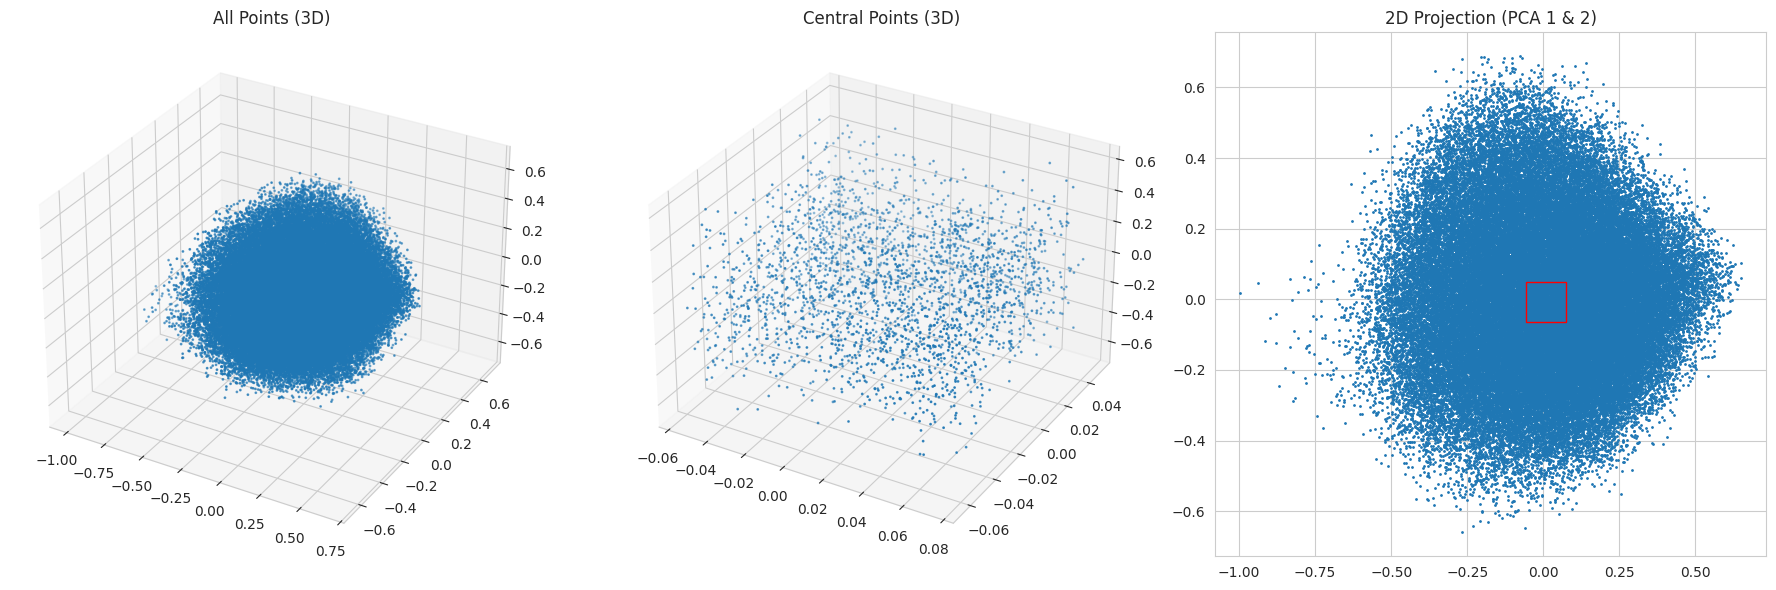

In [ ]:
#n=3 for 3D
ru_word_pca = PCA(n_components=3)
ru_cbow_space_pca = ru_word_pca.fit_transform(ru_word_space)  # Fit + transform

xl, xr = [np.percentile(ru_cbow_space_pca[:,0], q=40), np.percentile(ru_cbow_space_pca[:,0], q=60)]
yl, yr = [np.percentile(ru_cbow_space_pca[:,1], q=40), np.percentile(ru_cbow_space_pca[:,1], q=60)]

idx = ((ru_cbow_space_pca[:,0] < xr) & (ru_cbow_space_pca[:,0] > xl) & \
 (ru_cbow_space_pca[:,1] < yr) & (ru_cbow_space_pca[:,1] > yl))

from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure(figsize=(18, 6))

# Subplot 1: All points (3D)
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(ru_cbow_space_pca[:, 0], ru_cbow_space_pca[:, 1], ru_cbow_space_pca[:, 2], s=1)
ax1.set_title('All Points (3D)')

# Subplot 2: Central points (3D)
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(ru_cbow_space_pca[idx, 0], ru_cbow_space_pca[idx, 1], ru_cbow_space_pca[idx, 2], s=1)
ax2.set_title('Central Points (3D)')

# Subplot 3: 2D projection (PCA axes 1 & 2)
ax3 = fig.add_subplot(133)
ax3.scatter(ru_cbow_space_pca[:, 0], ru_cbow_space_pca[:, 1], s=1)
rect = Rectangle((xl, yl), xr-xl, yr-yl, color='r', fill=False)
ax3.add_patch(rect)
ax3.set_title('2D Projection (PCA 1 & 2)')

plt.tight_layout()
plt.show()

### Визуализация кластеров

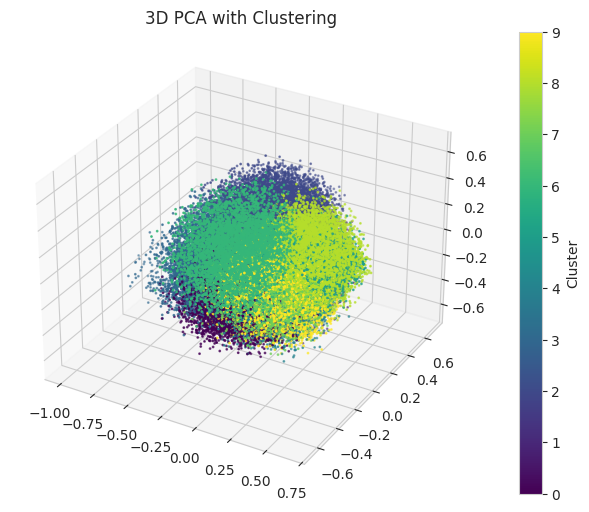

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(ru_cbow_space_pca[:, 0], ru_cbow_space_pca[:, 1], ru_cbow_space_pca[:, 2],
                     c=ru_word_km.labels_, s=1, cmap='viridis')
plt.colorbar(scatter, label='Cluster')
plt.title('3D PCA with Clustering')
plt.show()

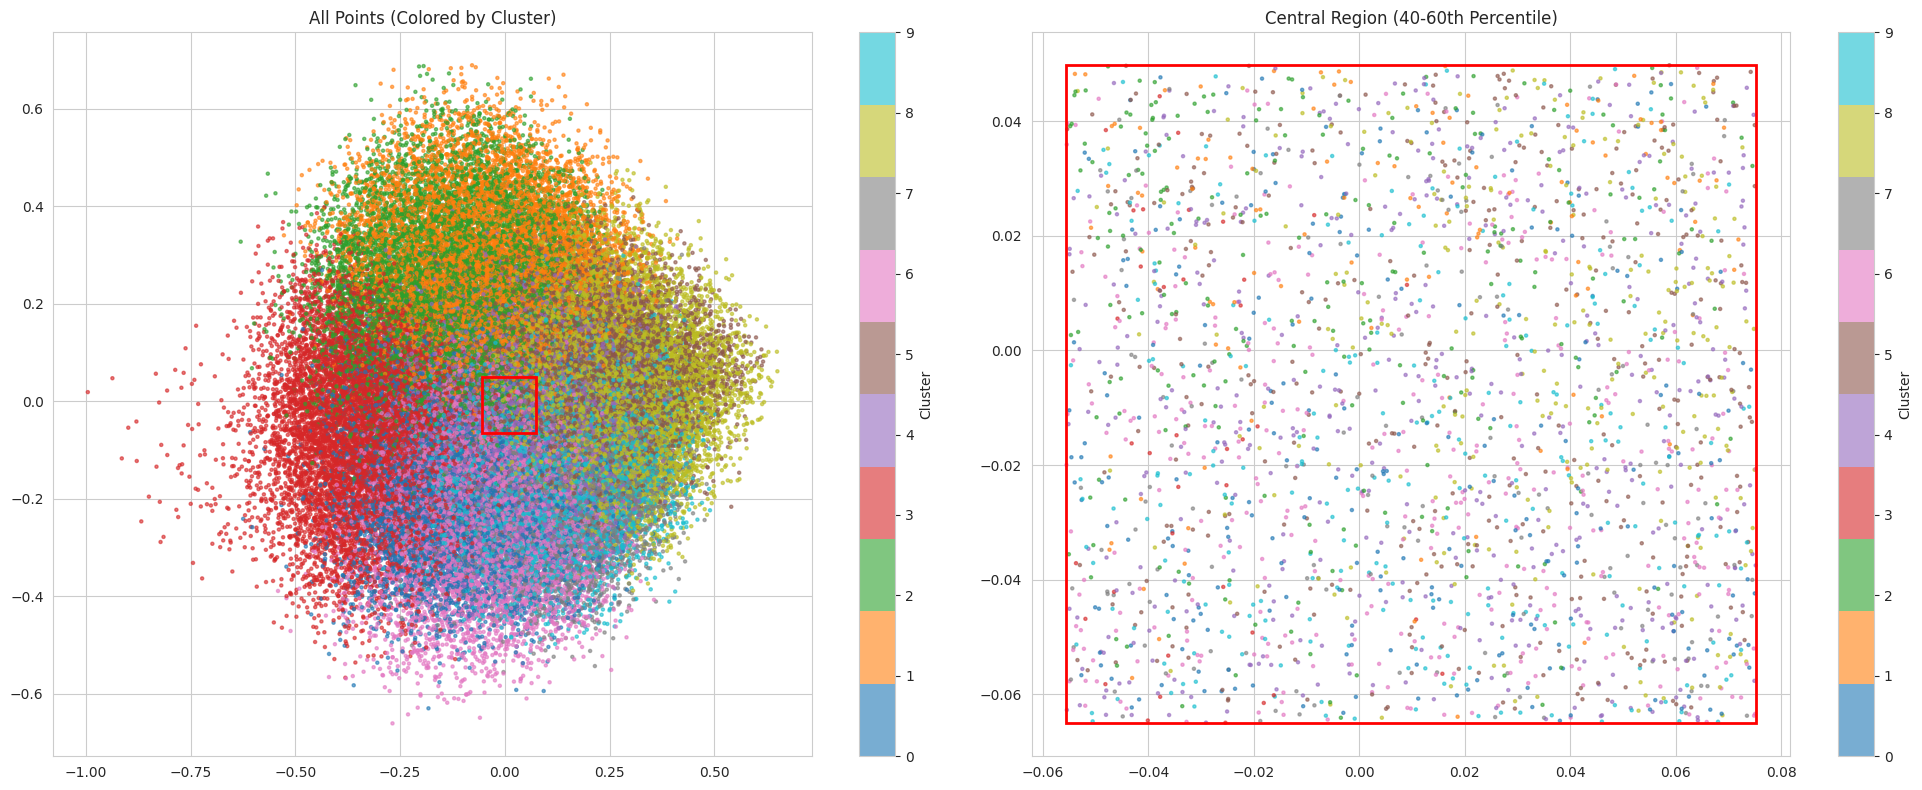

In [ ]:
# 4. Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: All points colored by cluster
sc1 = ax1.scatter(ru_cbow_space_pca[:, 0], ru_cbow_space_pca[:, 1],
                  c=ru_word_km.labels_, s=5, cmap='tab10', alpha=0.6)
ax1.add_patch(Rectangle((xl, yl), xr-xl, yr-yl, color='r', fill=False, linewidth=2))
ax1.set_title('All Points (Colored by Cluster)')
plt.colorbar(sc1, ax=ax1, label='Cluster')

# Plot 2: Central points only
sc2 = ax2.scatter(ru_cbow_space_pca[idx, 0], ru_cbow_space_pca[idx, 1],
                  c=ru_word_km.labels_[idx], s=5, cmap='tab10', alpha=0.6)
ax2.add_patch(Rectangle((xl, yl), xr-xl, yr-yl, color='r', fill=False, linewidth=2))
ax2.set_title('Central Region (40-60th Percentile)')
plt.colorbar(sc2, ax=ax2, label='Cluster')

plt.tight_layout()
plt.show()